# Jonathan Halverson
# Saturday, April 30, 2016
# Spark and IPython

In [2]:
lines = sc.textFile('text_file.md', use_unicode=False)

In [4]:
lines.take(5)

['# Apache Spark',
 '',
 'Spark is a fast and general cluster computing system for Big Data. It provides',
 'high-level APIs in Scala, Java, Python, and R, and an optimized engine that',
 'supports general computation graphs for data analysis. It also supports a']

In [11]:
py_lines = lines.filter(lambda line: 'Python' in line and 'Java' not in line)
jv_lines = lines.filter(lambda line: 'Java' in line and 'Python' not in line)
print py_lines.union(jv_lines).count(), lines.filter(lambda line: 'Python' in line or 'Java' in line).count()

2 3


### Using RDDs in a Python object

In [17]:
class ScalaFinder(object):
    def __init__(self, keyword):
        self.keyword = keyword
    def printLines(self, RDD):
        for line in RDD.collect():
            if (self.keyword in line):
                print line

In [19]:
sf = ScalaFinder('and')
sf.printLines(lines)

Spark is a fast and general cluster computing system for Big Data. It provides
high-level APIs in Scala, Java, Python, and R, and an optimized engine that
rich set of higher-level tools including Spark SQL for SQL and DataFrames,
and Spark Streaming for stream processing.
and [project wiki](https://cwiki.apache.org/confluence/display/SPARK).
To build Spark and its example programs, run:
Try the following command, which should return 1000:
And run the following command, which should also return 1000:
"yarn" to run on YARN, and "local" to run
Spark uses the Hadoop core library to talk to HDFS and other Hadoop-supported
building for particular Hive and Hive Thriftserver distributions.


### Construct a histogram of the word count per line

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [33]:
num_chars = lines.map(lambda line: len(line))
left, count = num_chars.histogram(range(0, 120, 10))

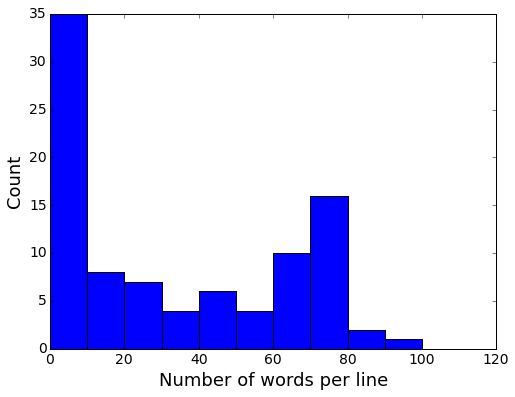

In [35]:
plt.bar(left[:-1], count, width=10)
plt.xlabel('Number of words per line')
plt.ylabel('Count')

In [39]:
num_chars_sq = lines.flatMap(lambda line: len(line)**2)
for item in num_chars_sq.take(4):
    if (item > 100): print item

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 21.0 failed 1 times, most recent failure: Lost task 0.0 in stage 21.0 (TID 55, localhost): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/jhalverson/software/spark-1.6.1-bin-hadoop2.6/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/Users/jhalverson/software/spark-1.6.1-bin-hadoop2.6/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/Users/jhalverson/software/spark-1.6.1-bin-hadoop2.6/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/Users/jhalverson/software/spark-1.6.1-bin-hadoop2.6/python/pyspark/rdd.py", line 1293, in takeUpToNumLeft
    yield next(iterator)
TypeError: 'int' object is not iterable

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:214)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1431)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1419)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1418)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1418)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1640)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1599)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1588)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:620)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1832)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1845)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1858)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:393)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:497)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/jhalverson/software/spark-1.6.1-bin-hadoop2.6/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/Users/jhalverson/software/spark-1.6.1-bin-hadoop2.6/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/Users/jhalverson/software/spark-1.6.1-bin-hadoop2.6/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/Users/jhalverson/software/spark-1.6.1-bin-hadoop2.6/python/pyspark/rdd.py", line 1293, in takeUpToNumLeft
    yield next(iterator)
TypeError: 'int' object is not iterable

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:214)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more
